In [82]:
import copy
import json
import os
import re
import shutil
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import skimage
import tifffile
import yaml
from einops import rearrange

In [83]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
%autoreload 2

In [85]:
import mushroom.data.multiplex as multiplex
import mushroom.data.visium as visium
import mushroom.data.xenium as xenium
import mushroom.data.cosmx as cosmx
import mushroom.data.he as he
import mushroom.data.user_points as points
import mushroom.registration.bigwarp as bigwarp
import mushroom.utils as utils

In [86]:
project_dir = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1'
Path(project_dir).mkdir(parents=True, exist_ok=True)

In [87]:
multiplex_channel = 'DAPI'
downscale = None

## input data

In [88]:
fps = sorted(utils.listfiles(project_dir, regex=r'registered/metadata.yaml$'))
fps

['/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00970/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-01287/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT339B2-H1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/metadata.yaml',
 '/diskmnt/Projects/Users/estorrs/m

###### C3L-00982

In [66]:
case = 'C3L-00982'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/s0_C3L-00982-U1_multiplex.ome.tiff'}],
   'position': 0,
   'sid': 'C3L-00982-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/s1_C3L-00982-U2_xenium.h5ad'}],
   'position': 5,
   'sid': 'C3L-00982-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/s2_C3L-00982-U4_multiplex.ome.tiff'}],
   'position': 15,
   'sid': 'C3L-00982-U4'},
  {'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00982/registered/s3_C3L-00982-U5_he.tif'}],
   'position': 20,
   'sid': 'C3L-00982-U5'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mu

###### C3L-02551

In [33]:
case = 'C3L-02551'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/s0_C3L-02551-U1_multiplex.ome.tiff'}],
   'position': 0,
   'sid': 'C3L-02551-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/s1_C3L-02551-U3_xenium.h5ad'}],
   'position': 10,
   'sid': 'C3L-02551-U3'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/s2_C3L-02551-U4_multiplex.ome.tiff'}],
   'position': 15,
   'sid': 'C3L-02551-U4'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-02551/registered/s3_C3L-02551-U8_multiplex.ome.tiff'}],
   'position': 35,
   'sid': 'C3L-02551-U8'}],
 'target_sid': 'C3L-02551-U3'}

###### HT206B1

In [43]:
case = 'HT206B1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/s0_HT206B1-U1_xenium.h5ad'}],
   'position': 0,
   'sid': 'HT206B1-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/s1_HT206B1-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'HT206B1-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/s2_HT206B1-U5_multiplex.ome.tiff'}],
   'position': 20,
   'sid': 'HT206B1-U5'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT206B1/registered/s3_HT206B1-U8_xenium.h5ad'}],
   'position': 40,
   'sid': 'HT206B1-U8'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projec

###### HT225C1

In [60]:
case = 'HT225C1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 2.484081102305233,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/s0_HT225C1-U2_visium.h5ad'}],
   'position': 0,
   'sid': 'HT225C1-U2'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/s1_HT225C1-U3_visium.h5ad'}],
   'position': 60,
   'sid': 'HT225C1-U3'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/s2_HT225C1-U4_visium.h5ad'}],
   'position': 120,
   'sid': 'HT225C1-U4'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT225C1/registered/s3_HT225C1-U5_visium.h5ad'}],
   'position': 180,
   'sid': 'HT225C1-U5'}],
 'target_sid': 'HT225C1-U2'}

###### HT268B1

In [85]:
case = 'HT268B1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 2.416043983128135,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/s0_HT268B1-U2_visium.h5ad'}],
   'position': 5,
   'sid': 'HT268B1-U2'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/s1_HT268B1-U12_visium.h5ad'}],
   'position': 55,
   'sid': 'HT268B1-U12'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/s2_HT268B1-U22_visium.h5ad'}],
   'position': 105,
   'sid': 'HT268B1-U22'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT268B1/registered/s3_HT268B1-U32_visium.h5ad'}],
   'position': 155,
   'sid': 'HT268B1-U32'}],
 'target_sid': 'HT268B1-U2'}

###### HT397B1

In [89]:
case = 'HT397B1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 0.36435700315543124,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s0_HT397B1-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s0_HT397B1-U1_he.tif'}],
   'position': 0,
   'sid': 'HT397B1-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s1_HT397B1-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'HT397B1-U2'},
  {'data': [{'dtype': 'batch2_he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s2_HT397B1-U4_batch2_he.tif'}],
   'position': 15,
   'sid': 'HT397B1-U4'},
  {'data': [{'dtype': 'batch2_he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/registered/s3_HT397B1-U

###### HT413C1-Th1k4A1

In [108]:
case = 'HT413C1-Th1k4A1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s0_HT413C1-Th1k4A1-U14_he.tif'}],
   'position': 0,
   'sid': 'HT413C1-Th1k4A1-U14'},
  {'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s1_HT413C1-Th1k4A1-U18_he.tif'}],
   'position': 20,
   'sid': 'HT413C1-Th1k4A1-U18'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s2_HT413C1-Th1k4A1-U19_xenium.h5ad'}],
   'position': 25,
   'sid': 'HT413C1-Th1k4A1-U19'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s3_HT413C1-Th1k4A1-U20_multiplex.ome.tiff'}],
   'position': 30,
   'sid': 'HT413C1-Th1k4A1-U20'},
  {'data': [{'dtype': 'he

###### S18-25943-A7

In [119]:
case = 'S18-25943-A7'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-25943-A7/registered/s0_S18-25943-A7-U1_xenium.h5ad'}],
   'position': 0,
   'sid': 'S18-25943-A7-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-25943-A7/registered/s1_S18-25943-A7-U4_xenium.h5ad'}],
   'position': 15,
   'sid': 'S18-25943-A7-U4'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-25943-A7/registered/s2_S18-25943-A7-U8_xenium.h5ad'}],
   'position': 35,
   'sid': 'S18-25943-A7-U8'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-25943-A7/registered/s3_S18-25943-A7-U9_multiplex.ome.tiff'}],
   'position': 40,
   'sid': 'S18-25943-A7-U9'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/

###### S18-5591-C8

In [130]:
case = 'S18-5591-C8'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-5591-C8/registered/s0_S18-5591-C8-U1_xenium.h5ad'}],
   'position': 0,
   'sid': 'S18-5591-C8-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-5591-C8/registered/s1_S18-5591-C8-U5_xenium.h5ad'}],
   'position': 20,
   'sid': 'S18-5591-C8-U5'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-5591-C8/registered/s2_S18-5591-C8-U7_xenium.h5ad'}],
   'position': 30,
   'sid': 'S18-5591-C8-U7'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-5591-C8/registered/s3_S18-5591-C8-U8_multiplex.ome.tiff'}],
   'position': 35,
   'sid': 'S18-5591-C8-U8'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Proj

###### S18-9906

In [145]:
case = 'S18-9906'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s0_S18-9906-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s0_S18-9906-U1_he.tif'}],
   'position': 0,
   'sid': 'S18-9906-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s1_S18-9906-U2_xenium.h5ad'}],
   'position': 5,
   'sid': 'S18-9906-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s2_S18-9906-U3_multiplex.ome.tiff'}],
   'position': 10,
   'sid': 'S18-9906-U3'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/S18-9906/registered/s3_S18-9906-U9_xenium.h5

###### C3L-00970

In [9]:
case = 'C3L-00970'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00970/registered/s0_C3L-00970-U1_xenium.h5ad'}],
   'position': 0,
   'sid': 'C3L-00970-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-00970/registered/s1_C3L-00970-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'C3L-00970-U2'}],
 'target_sid': 'C3L-00970-U1'}

###### C3L-01287

In [21]:
case = 'C3L-01287'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-01287/registered/s0_C3L-01287-U1_xenium.h5ad'}],
   'position': 0,
   'sid': 'C3L-01287-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/C3L-01287/registered/s1_C3L-01287-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'C3L-01287-U2'}],
 'target_sid': 'C3L-01287-U1'}

###### HT413C1-K2

In [32]:
case = 'HT413C1-K2'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 2.3845710250431806,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-K2/registered/s0_HT413C1-K2-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-K2/registered/s0_HT413C1-K2-U1_he.tif'}],
   'position': 0,
   'sid': 'HT413C1-K2-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-K2/registered/s1_HT413C1-K2-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'HT413C1-K2-U2'}],
 'target_sid': 'HT413C1-K2-U1'}

###### HT339B2-H1

In [50]:
case = 'HT339B2-H1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 0.35026268395892945,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT339B2-H1/registered/s0_HT339B2-H1-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT339B2-H1/registered/s0_HT339B2-H1-U1_he.tif'}],
   'position': 0,
   'sid': 'HT339B2-H1-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT339B2-H1/registered/s1_HT339B2-H1-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'HT339B2-H1-U2'}],
 'target_sid': 'HT339B2-H1-U1'}

###### HT553P1-H2

In [56]:
case = 'HT553P1-H2'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 2.4161187954381664,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT553P1-H2/registered/s0_HT553P1-H2-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT553P1-H2/registered/s0_HT553P1-H2-U1_he.tif'}],
   'position': 0,
   'sid': 'HT553P1-H2-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT553P1-H2/registered/s1_HT553P1-H2-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'HT553P1-H2-U2'}],
 'target_sid': 'HT553P1-H2-U1'}

###### HT565B1-H2

In [67]:
case = 'HT565B1-H2'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 2.4783396219710836,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT565B1-H2/registered/s0_HT565B1-H2-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT565B1-H2/registered/s0_HT565B1-H2-U1_he.tif'}],
   'position': 0,
   'sid': 'HT565B1-H2-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT565B1-H2/registered/s1_HT565B1-H2-U2_multiplex.ome.tiff'}],
   'position': 0,
   'sid': 'HT565B1-H2-U2'}],
 'target_sid': 'HT565B1-H2-U1'}

###### HT448C1-Th1K1Fp1

In [30]:
case = 'HT448C1-Th1K1Fp1'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 0.3646048129944151,
 'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT448C1-Th1K1Fp1/registered/s0_HT448C1-Th1K1Fp1-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT448C1-Th1K1Fp1/registered/s0_HT448C1-Th1K1Fp1-U1_he.tif'}],
   'position': 0,
   'sid': 'HT448C1-Th1K1Fp1-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT448C1-Th1K1Fp1/registered/s1_HT448C1-Th1K1Fp1-U2_multiplex.ome.tiff'}],
   'position': 5,
   'sid': 'HT448C1-Th1K1Fp1-U2'},
  {'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT448C1-Th1K1Fp1/registered/s2_HT448C1-Th1K1Fp1-U13_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT448C

###### WD-76845

In [90]:
case = 'WD-76845'
fp = [fp for fp in fps if case == fp.split('/')[-3]][0]
data_map = yaml.safe_load(open(fp))

output_dir = os.path.join(project_dir, case, 'masks')
Path(output_dir).mkdir(parents=True, exist_ok=True)

data_map

{'resolution': 0.6499999761581421,
 'sections': [{'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s0_WD-76845-U1_he.tif'}],
   'position': 5,
   'sid': 'WD-76845-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s1_WD-76845-U2_multiplex.ome.tiff'}],
   'position': 10,
   'sid': 'WD-76845-U2'},
  {'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s2_WD-76845-U6_he.tif'}],
   'position': 30,
   'sid': 'WD-76845-U6'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s3_WD-76845-U7_multiplex.ome.tiff'}],
   'position': 35,
   'sid': 'WD-76845-U7'},
  {'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/

In [9]:
downscale = .05
multiplex_channel = 'DNA'

## create combined_image

In [90]:
def correct_scale(img, ths):
    sf = 1 / ths
    
    dim_order = 'h w' if len(img.shape) == 2 else 'h w c'
    img = utils.rescale(img, scale=sf, dim_order=dim_order, target_dtype=np.uint8) # scale image    
    return img  

In [91]:
imgs = []
for idx, item in enumerate(data_map['sections']):
    sid = item['sid']
    mapping = item['data'][0]
    dtype, filepath = mapping['dtype'], mapping['filepath']
    print(sid, dtype)

    if utils.parse_dtype(dtype) == 'visium':
        adata = visium.adata_from_visium(filepath)
        img = next(iter(adata.uns['spatial'].values()))['images']['hires']
        ths = next(iter(adata.uns['spatial'].values()))['scalefactors']['tissue_hires_scalef']
        img = correct_scale(img, ths)
        img = img[..., 0]
    elif utils.parse_dtype(dtype) == 'xenium':
        adata = xenium.adata_from_xenium(filepath)
        img = next(iter(adata.uns['spatial'].values()))['images']['hires']
        ths = next(iter(adata.uns['spatial'].values()))['scalefactors']['tissue_hires_scalef']
        img = correct_scale(img, ths)
    elif utils.parse_dtype(dtype) == 'cosmx':
        adata = cosmx.adata_from_cosmx(filepath)
        img = next(iter(adata.uns['spatial'].values()))['images']['hires']
        ths = next(iter(adata.uns['spatial'].values()))['scalefactors']['tissue_hires_scalef']
        img = correct_scale(img, ths)
    elif utils.parse_dtype(dtype) == 'multiplex':
        img = multiplex.extract_ome_tiff(
            filepath, channels=[multiplex_channel],
        )[multiplex_channel]
    elif utils.parse_dtype(dtype) == 'he':
        img = he.read_he(filepath)
        img = img[..., 0]
    else:
        raise RuntimeError(f'{dtype} not valid st data type')

    
    if downscale is not None:
        img = utils.rescale(img, scale=downscale, dim_order='h w')
        
    img = rearrange(img, 'h w -> h w 1')
    
    
    imgs.append(img)

for img in imgs:
    print(img.shape, img.dtype)

HT397B1-U1 visium
HT397B1-U2 multiplex
HT397B1-U4 batch2_he
HT397B1-U8 batch2_he
HT397B1-U11 batch2_he
HT397B1-U12 multiplex
HT397B1-U16 batch2_he
HT397B1-U21 visium
HT397B1-U22 multiplex
HT397B1-U20 batch2_he
HT397B1-U28 batch2_he
HT397B1-U31 multiplex
(18643, 18381, 1) uint8
(18640, 18380, 1) uint8
(18640, 18380, 1) uint8
(18640, 18380, 1) uint8
(18640, 18380, 1) uint8
(18640, 18380, 1) uint8
(18640, 18380, 1) uint8
(18636, 18375, 1) float64
(18640, 18380, 1) uint8
(18640, 18380, 1) uint8
(18640, 18380, 1) uint8
(18640, 18380, 1) uint8


In [92]:
min_h, min_w = min([img.shape[0] for img in imgs]), min([img.shape[1] for img in imgs])
combined = np.concatenate([img[:min_h, :min_w] for img in imgs], axis=-1)
combined.shape

(18636, 18375, 12)

In [121]:
multiplex.write_basic_ome_tiff(os.path.join(output_dir, 'combined_image.tif'),
                               rearrange(combined, 'h w c -> c h w'), channels=list(range(combined.shape[-1])))

In [122]:
os.path.join(output_dir, 'combined_image.tif')

'/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/masks/combined_image.tif'

###### load in qupath polygon and save mask

In [93]:
geo = json.load(open(os.path.join(output_dir, 'tissue_mask.geojson')))

polygons = []
for feat in geo['features']:
    
    if feat['geometry']['type'] == 'Polygon':
        pts = feat['geometry']['coordinates'][0]
    else:
        pts = feat['geometry']['coordinates'][-1][0]
    polygons.append(np.asarray(pts, dtype=int))
polygons

[array([[ 7280,  1448],
        [ 5687,  1738],
        [ 5663,  1738],
        [ 4649,  2896],
        [ 3852,  4465],
        [ 3514,  5262],
        [ 2886,  5286],
        [ 2862,  5286],
        [ 2718,  4996],
        [ 2235,  4441],
        [ 1342,  4296],
        [ 1317, 16608],
        [10153, 16608],
        [10804, 16222],
        [12325, 16222],
        [14232, 16053],
        [14256, 16053],
        [15367, 15835],
        [15922, 15835],
        [16598, 15859],
        [17274, 15521],
        [17201, 14701],
        [17201, 14677],
        [15970, 12890],
        [15101, 11852],
        [15343, 10983],
        [15367,  9776],
        [15391,  9776],
        [14377,  7072],
        [13243,  4224],
        [12856,  3258],
        [12204,  2051],
        [11335,  1472],
        [ 7280,  1448]])]

In [94]:
size = combined.shape[:2]
mask = np.zeros(size, dtype=bool)
for pts in polygons:
    mask |= skimage.draw.polygon2mask(size, pts[:, [1, 0]])
mask.shape

(18636, 18375)

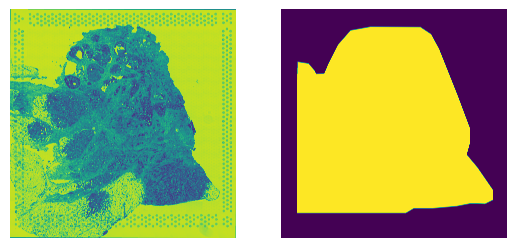

In [95]:
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(combined[..., 0])
axs[1].imshow(mask)
for ax in axs:
    ax.axis('off')

In [96]:
import torchvision.transforms.functional as TF
if downscale is not None:
    mask = utils.rescale(mask, scale= 1 / downscale, dim_order='h w', target_dtype=bool, antialias=False, interpolation=TF.InterpolationMode.NEAREST)
mask.shape, mask.dtype

((18636, 18375), dtype('bool'))

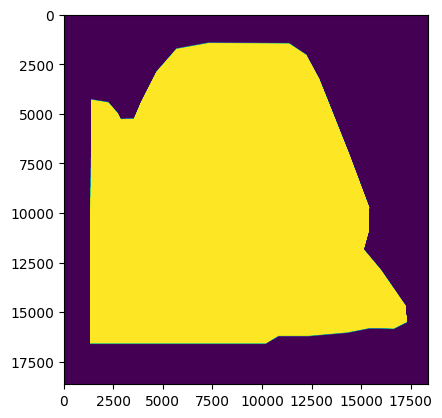

In [97]:
plt.imshow(mask)

In [98]:
tifffile.imwrite(os.path.join(output_dir, 'tissue_mask.tif'), mask, compression='LZW')